# slowsort

In [1]:
import timeit
import random
import matplotlib.pyplot as plt

In [2]:
def _slowsort(a, i, j):
    """in-place sorts the integers in the array
    spanning indexes [i, j].
    """
    # base condition; then no need of sorting if
    #  - there is one element to sort
    #  - when start and end of the array flipped positions
    if i >= j:
        return

    # find the mid index of the array so that the
    # problem could be divided intto sub-problems of
    # smaller spans
    m = (i + j) // 2

    # invoke the slowsort on both the subarrays
    _slowsort(a, i, m)
    _slowsort(a, m + 1, j)
  
    # once both the subproblems are solved, check if
    # last elements of both subarrays and move the
    # higher among the both to end of the right subarray
    # ensuring that the highest element is placed at the
    # correct position
    if a[m] > a[j]:
        a[m], a[j] = a[j], a[m]
  
    # now that the rightmost element of the subarray is at
    # the correct position, we invoke slowsort on all the elemnts
    # except the last one.
    _slowsort(a, i, j - 1)

In [1]:
def slowsort(a):
    """in-place sorts the array `a` using Slowsort.
    """
    _slowsort(a, 0, len(a) - 1)

In [4]:
arr = [5,4,3,2,1,6]
slowsort(arr)
print(arr)

[1, 2, 3, 4, 5, 6]


In [5]:
def bubblesort(a): 
    for i in range(len(a)): 
        if i+1 < len(a) and a[i] > a[i+1]: 
            a[i], a[i+1] = a[i+1], a[i]
            bubblesort(a)

In [6]:
arr = [5,4,3,2,1,8]
bubblesort(arr)
print(arr)

[1, 2, 3, 4, 5, 8]


In [7]:
def bench_bestcase(size):
    arr1 = list(range(size))
    arr2 = arr1[:]
    return lambda: bubblesort(arr1), lambda: slowsort(arr2)

In [8]:
def bench_worstcase(size):
    arr1 = list(range(size, 0, -1))
    arr2 = arr1[:]
    return lambda: bubblesort(arr1), lambda: slowsort(arr2)

In [9]:
def bench_averagecase(size):
    arr1 = list(range(size))
    random.shuffle(arr1)
    arr2 = arr1[:]
    return lambda: bubblesort(arr1), lambda: slowsort(arr2)

In [10]:
def bench(fns, title):
    sz, ts_bs, ts_ss = [], [], []
    for l in range(1, 71):
        size = l
        sz.append(size)
        fn1, fn2 = fns(size)
        ts_bs.append(sum(timeit.repeat(fn1, repeat=1, number=1))/1)
        ts_ss.append(sum(timeit.repeat(fn2, repeat=1, number=1))/1)
    plt.plot(sz, ts_bs, label = "bubblesort")
    plt.plot(sz, ts_ss, label = "slowsort")
    plt.xlabel('number of items')
    plt.ylabel('time taken')
    plt.title(title)
    plt.legend()
    plt.show()

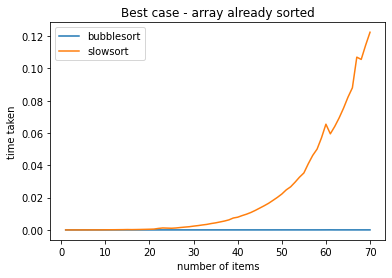

In [11]:
bench(bench_bestcase, 'Best case - array already sorted')

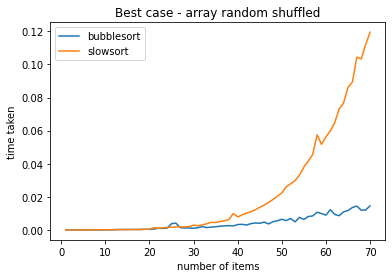

In [12]:
bench(bench_averagecase, 'Best case - array random shuffled')

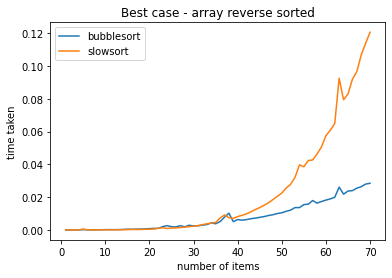

In [13]:
bench(bench_worstcase, 'Best case - array reverse sorted')